# Copy Number Variation

In [1]:
from pylluminator.samples import Samples
from pylluminator.cnv import copy_number_variation
from pylluminator.utils import load_object, save_object, set_logger
from pylluminator.visualizations import manhattan_plot_cnv

set_logger('WARNING')  # set the verbosity level, can be DEBUG, INFO, WARNING, ERROR

## Load pylluminator Samples

We assume that you have already processed the .idat files according to your preferences and saved them. If not, please refer to notebook `1 - Read data and get beta values` before going any further.

In [2]:
my_samples = Samples.load('preprocessed_samples')
my_samples

Samples object with 6 samples: PREC_500_1, PREC_500_3, LNCAP_500_3, LNCAP_500_2, LNCAP_500_1, PREC_500_2
EPICv2 array - genome version hg38
937,688 probes

In [3]:
sample_sheet = my_samples.sample_sheet
sample_sheet

,sample_id,sample_name,sample_type
0,GSM7698459,PREC_500_3,PREC
1,GSM7698462,LNCAP_500_3,LNCAP
2,GSM7698435,PREC_500_1,PREC
3,GSM7698443,PREC_500_2,PREC
4,GSM7698438,LNCAP_500_1,LNCAP
5,GSM7698446,LNCAP_500_2,LNCAP


## Get CNVs for a sample

In [4]:
name = 'LNCAP_500_1'  # sample name
normalization_samples = sample_sheet[sample_sheet.sample_type == 'PREC'].sample_name.values
print('normalization_samples : ', normalization_samples)

ranges, signal_bins_df, segments_df = copy_number_variation(my_samples, sample_label=name, normalization_sample_labels=normalization_samples)

normalization_samples :  ['PREC_500_3' 'PREC_500_1' 'PREC_500_2']


## Visualize CNVs and segments

Plot the identified segments and CNV values

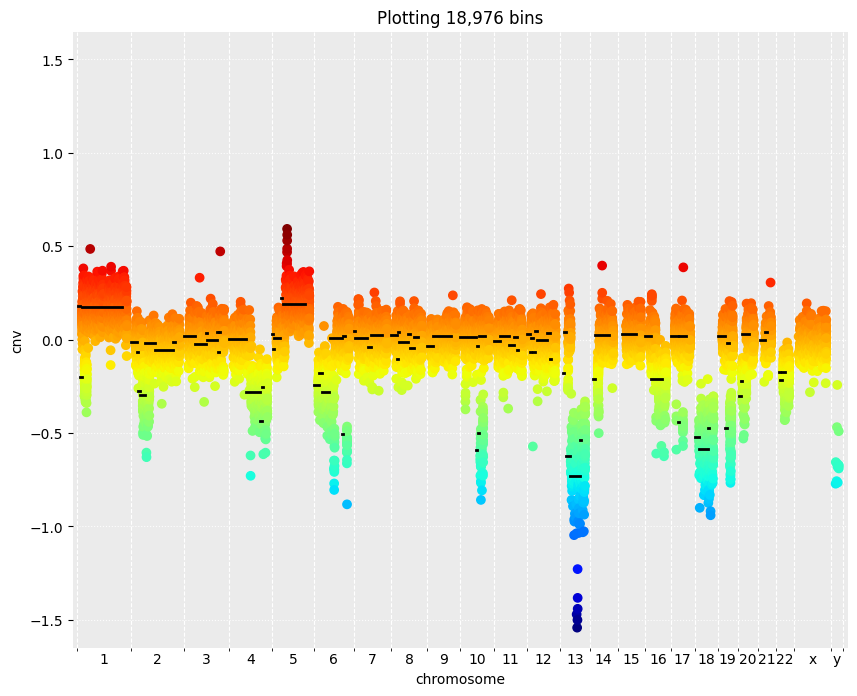

In [5]:
manhattan_plot_cnv(signal_bins_df, segments_df)